<a href="https://colab.research.google.com/github/sanaharora/EDATheoryDA/blob/main/DA1_upto_multivariate_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bodyPerformance.csv"
df = pd.read_csv(url)

# Step 1: Check the basic information
print("Initial Info:")
df.info()
print("\nInitial Head:")
print(df.head())
# Get column names
columns = df.columns.tolist()
print("Column Names:", columns)
# Step 2: Remove duplicate rows
df.drop_duplicates(inplace=True)

# Step 3: Handle missing values (if any)
# Check for missing values
print("\nMissing Values Before:")
print(df.isnull().sum())

# Fill or drop missing values (based on the context)
df.fillna(df.mean(numeric_only=True), inplace=True)



Initial Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  int64  
 1   gender                   13392 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13392 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13392 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.2+ MB

Initial Head:
   age gender  height_cm  weight_kg  body fa

In [2]:
# Step 4: Convert categorical columns to proper data types
categorical_cols = ['gender', 'class']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Step 5: Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Step 6: Handle outliers (optional based on your analysis)
# Example: Remove outliers based on z-score
from scipy.stats import zscore
numeric_cols = df.select_dtypes(include=np.number).columns
df = df[(np.abs(zscore(df[numeric_cols])) < 3).all(axis=1)]

# Step 7: Verify the cleaned data
print("\nCleaned Data Info:")
df.info()
print("\nSample Data:")
print(df.head())

# Step 8: Save the cleaned data (optional)
df.to_csv('cleaned_body_performance.csv', index=False)


Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 13049 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      13049 non-null  int64   
 1   gender                   13048 non-null  category
 2   height_cm                13049 non-null  float64 
 3   weight_kg                13049 non-null  float64 
 4   body_fat_%               13049 non-null  float64 
 5   diastolic                13049 non-null  float64 
 6   systolic                 13049 non-null  float64 
 7   gripforce                13049 non-null  float64 
 8   sit_and_bend_forward_cm  13049 non-null  float64 
 9   sit-ups_counts           13049 non-null  float64 
 10  broad_jump_cm            13049 non-null  float64 
 11  class                    13049 non-null  category
dtypes: category(2), float64(9), int64(1)
memory usage: 1.1 MB

Sample Data:
   age gender  height_cm  wei

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bodyPerformance.csv"
df = pd.read_csv(url)

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Task 1: Measure of Central Tendency (height_cm)
mean_height = df['height_cm'].mean()
median_height = df['height_cm'].median()
mode_height = df['height_cm'].mode()[0]

print(f"Mean Height: {mean_height}")
print(f"Median Height: {median_height}")
print(f"Mode Height: {mode_height}")

# Task 2: Measure of Dispersion (height_cm)
std_dev_height = df['height_cm'].std()
variance_height = df['height_cm'].var()

print(f"Standard Deviation of Height: {std_dev_height}")
print(f"Variance of Height: {variance_height}")

# Task 3: Quartiles and IQR (height_cm)
q1 = df['height_cm'].quantile(0.25)
q3 = df['height_cm'].quantile(0.75)
iqr = q3 - q1

print(f"Q1 (25th percentile): {q1}")
print(f"Q3 (75th percentile): {q3}")
print(f"IQR (Interquartile Range): {iqr}")

# Task 4: Correlation (between 'weight_kg' and 'gripforce')
correlation = df[['weight_kg', 'gripforce']].corr().iloc[0, 1]
print(f"Correlation between Weight and Gripforce: {correlation}")


Mean Height: 168.5598073620548
Median Height: 169.2
Mode Height: 170.0
Standard Deviation of Height: 8.426582550560244
Variance of Height: 71.00729348140639
Q1 (25th percentile): 162.4
Q3 (75th percentile): 174.8
IQR (Interquartile Range): 12.400000000000006
Correlation between Weight and Gripforce: 0.700118898071715


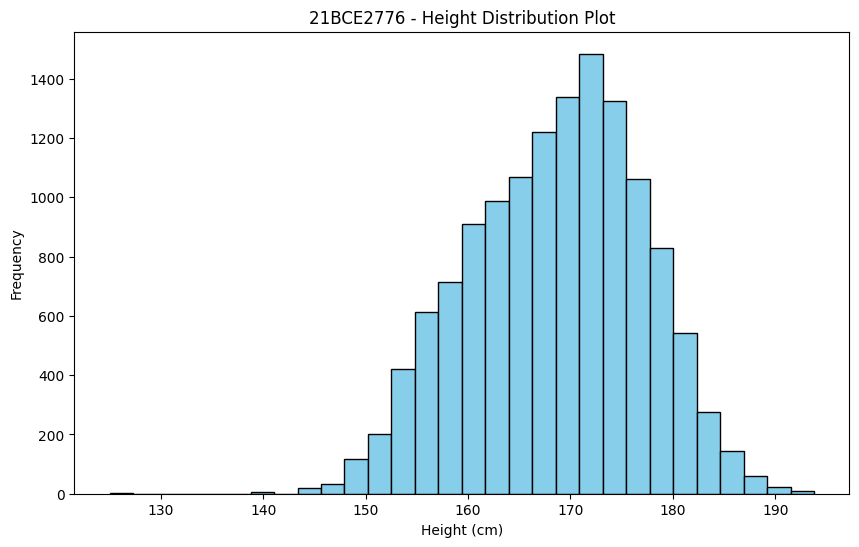

In [9]:

# Task 5: Univariate Analysis

# 5.1 Histogram for Height
plt.figure(figsize=(10, 6))
plt.hist(df['height_cm'], bins=30, color='skyblue', edgecolor='black')
plt.title('21BCE2776 - Height Distribution Plot')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.show()



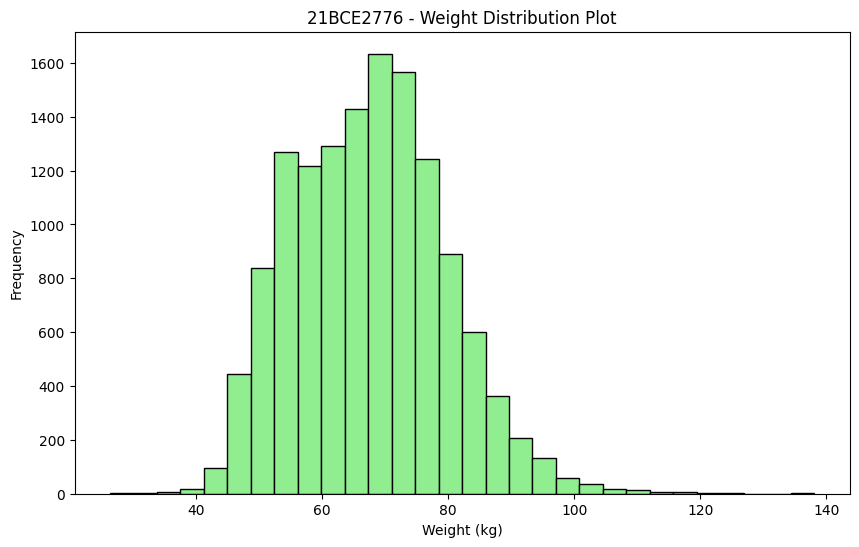

In [10]:
# 5.2 Histogram for Weight
plt.figure(figsize=(10, 6))
plt.hist(df['weight_kg'], bins=30, color='lightgreen', edgecolor='black')
plt.title('21BCE2776 - Weight Distribution Plot')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()


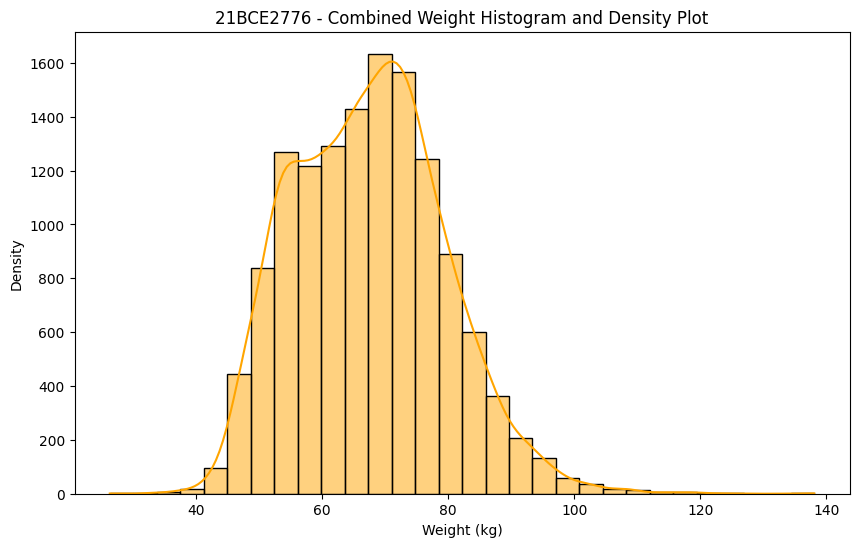

In [11]:
# 5.4 Combined Histogram and Density Plot for Weight
plt.figure(figsize=(10, 6))
sns.histplot(df['weight_kg'], bins=30, kde=True, color='orange')
plt.title('21BCE2776 - Combined Weight Histogram and Density Plot')
plt.xlabel('Weight (kg)')
plt.ylabel('Density')
plt.show()

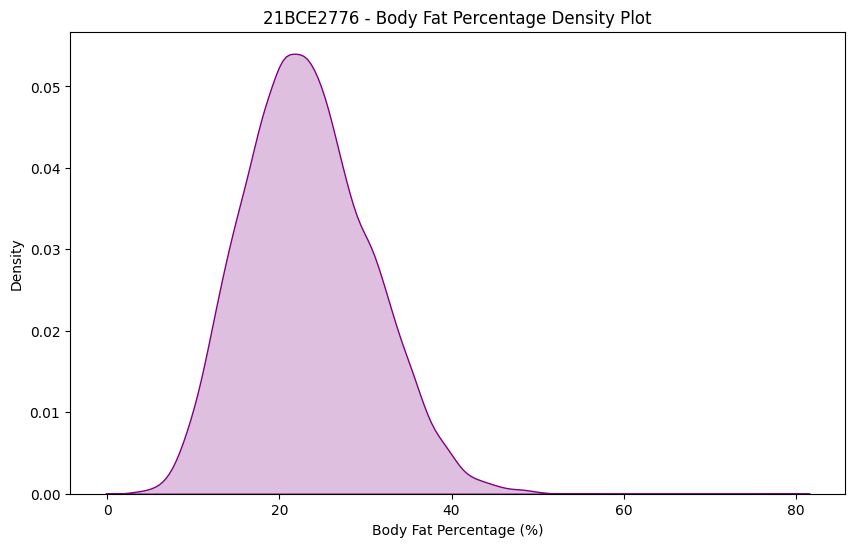

In [12]:

# 5.3 Density Plot for Body Fat Percentage
plt.figure(figsize=(10, 6))
sns.kdeplot(df['body_fat_%'], color='purple', fill=True)
plt.title('21BCE2776 - Body Fat Percentage Density Plot')
plt.xlabel('Body Fat Percentage (%)')
plt.show()


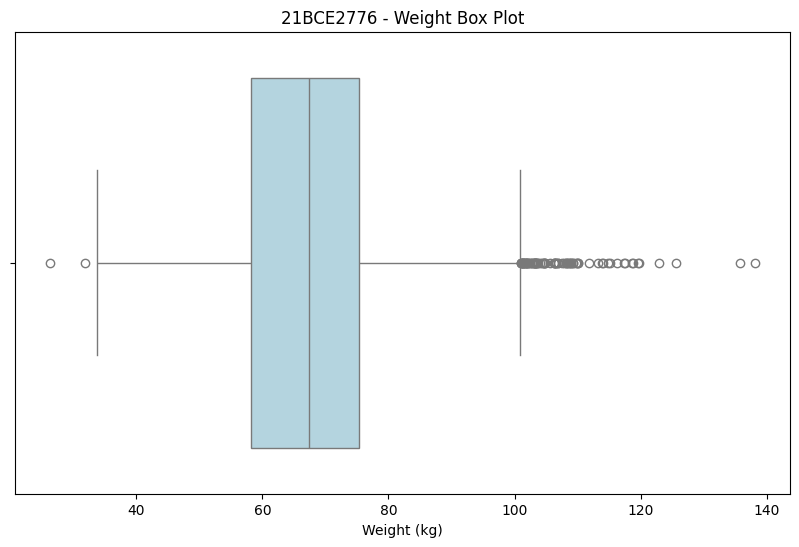

In [8]:
# 5.5 Box Plot for Weight
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['weight_kg'], color='lightblue')
plt.title('21BCE2776 - Weight Box Plot')
plt.xlabel('Weight (kg)')
plt.show()


In [13]:
pip install plotnine

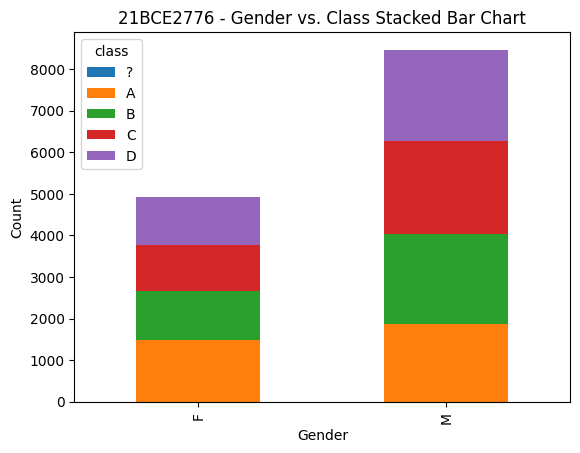

In [15]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Convert categorical columns
df['gender'] = df['gender'].astype('category')
df['class'] = df['class'].astype('category')

# Categorical vs. Categorical
# 3.1 Stacked Bar Chart using Matplotlib
contingency_table = pd.crosstab(df['gender'], df['class'])
contingency_table.plot(kind='bar', stacked=True)
plt.title('21BCE2776 - Gender vs. Class Stacked Bar Chart')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


In [17]:

import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import ggplot, aes, geom_bar, geom_point, geom_line, geom_boxplot, geom_violin, geom_density, facet_wrap, facet_grid, theme

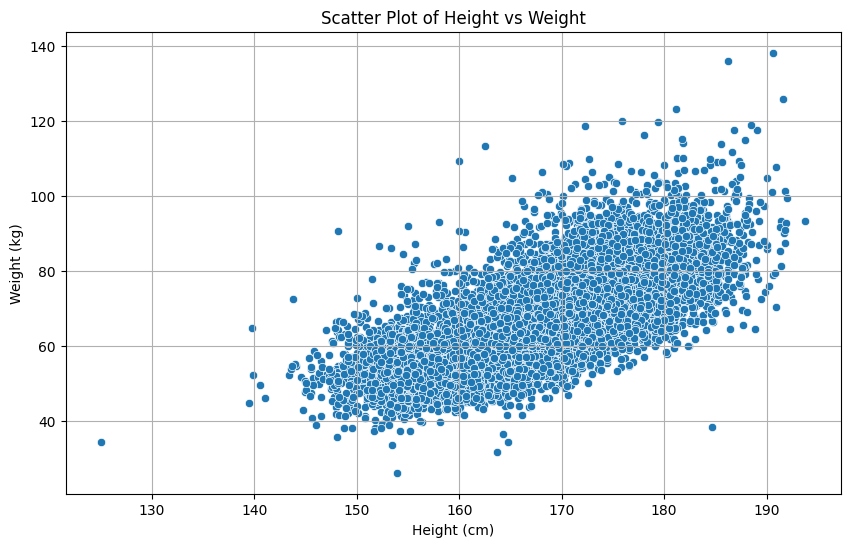

In [25]:
# 4.1 Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='height_cm', y='weight_kg')
plt.title("Scatter Plot of Height vs Weight")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.grid()
plt.show()



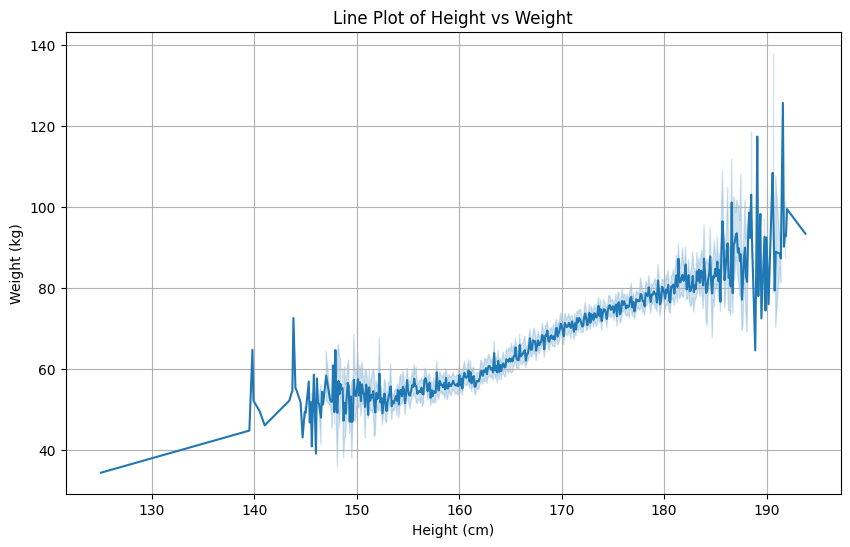

In [26]:
# 4.2 Line Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='height_cm', y='weight_kg')
plt.title("Line Plot of Height vs Weight")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.grid()
plt.show()


In [30]:
import pandas as pd
from plotnine import ggplot, aes, geom_bar, ggtitle, theme




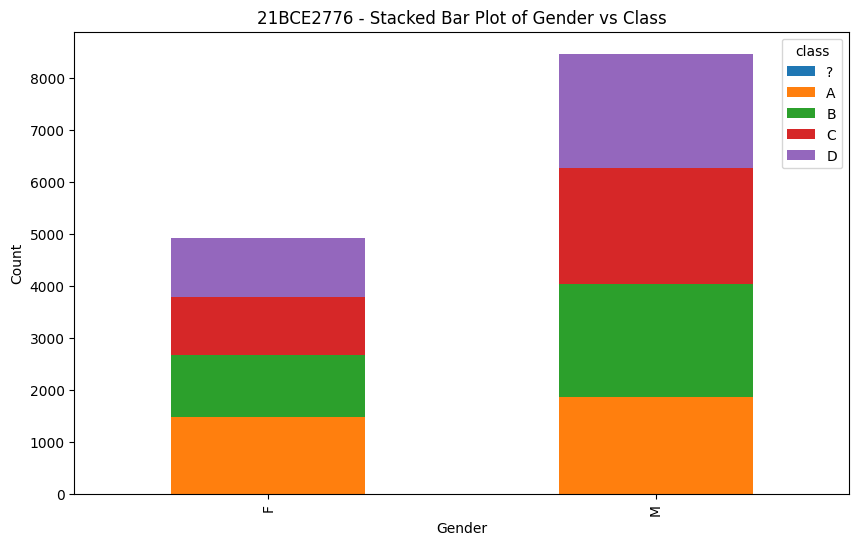

In [32]:
# 3.2 Stacked Bar Plot
# Count the occurrences of each combination of gender and class
stacked_data = pd.crosstab(df['gender'], df['class'])

# Plot the stacked bar plot
stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('21BCE2776 - Stacked Bar Plot of Gender vs Class')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


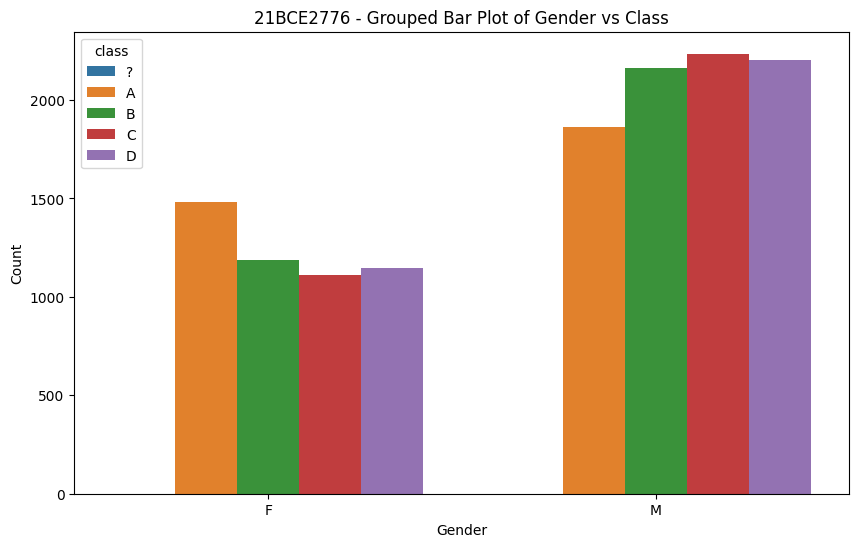

In [34]:

# 3.3 Grouped Bar Plot (Side-by-Side)
# Plot the grouped bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='class', data=df)
plt.title('21BCE2776 - Grouped Bar Plot of Gender vs Class')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

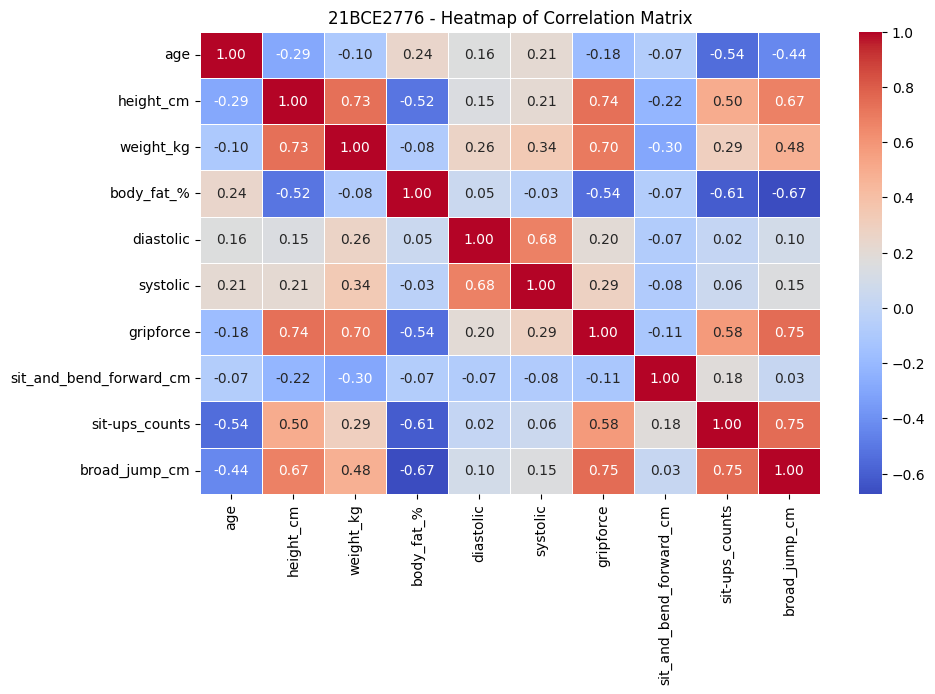

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 1. Heatmap (Correlation between numerical variables)
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
corr_matrix = numeric_df.corr()  # Calculate correlations on the numeric subset


# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('21BCE2776 - Heatmap of Correlation Matrix')
plt.show()

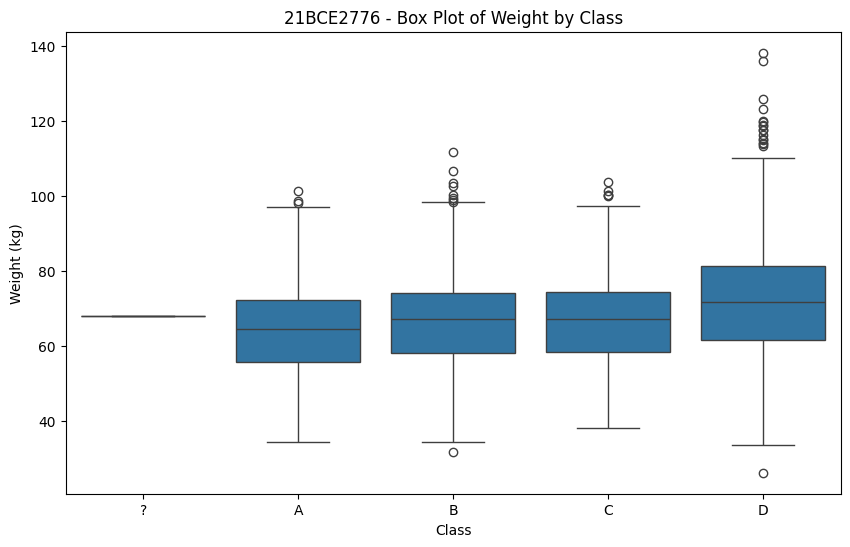

In [40]:
# 2. Box Plot (Distribution of 'weight_kg' across 'class')
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='weight_kg', data=df)
plt.title('21BCE2776 - Box Plot of Weight by Class')
plt.xlabel('Class')
plt.ylabel('Weight (kg)')
plt.show()


<ipython-input-41-59bb648f61e8>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



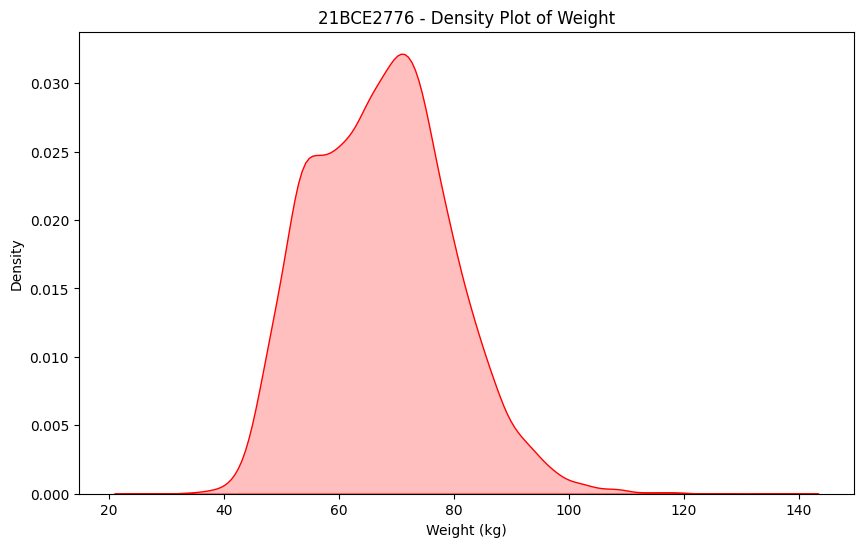

In [41]:
# 3. Density Plot (Density of 'weight_kg')
plt.figure(figsize=(10, 6))
sns.kdeplot(df['weight_kg'], shade=True, color='r')
plt.title('21BCE2776 - Density Plot of Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Density')
plt.show()


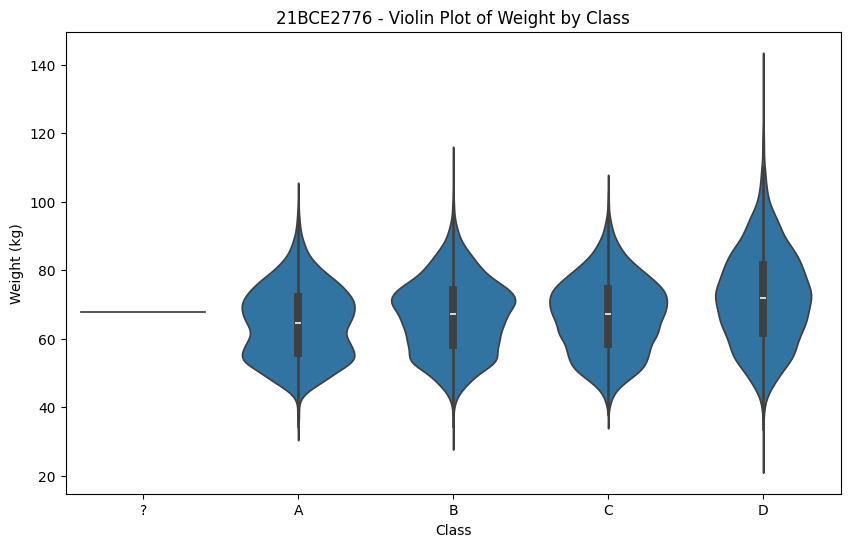

In [42]:
# 4. Violin Plot (Distribution of 'weight_kg' across 'class')
plt.figure(figsize=(10, 6))
sns.violinplot(x='class', y='weight_kg', data=df)
plt.title('21BCE2776 - Violin Plot of Weight by Class')
plt.xlabel('Class')
plt.ylabel('Weight (kg)')
plt.show()

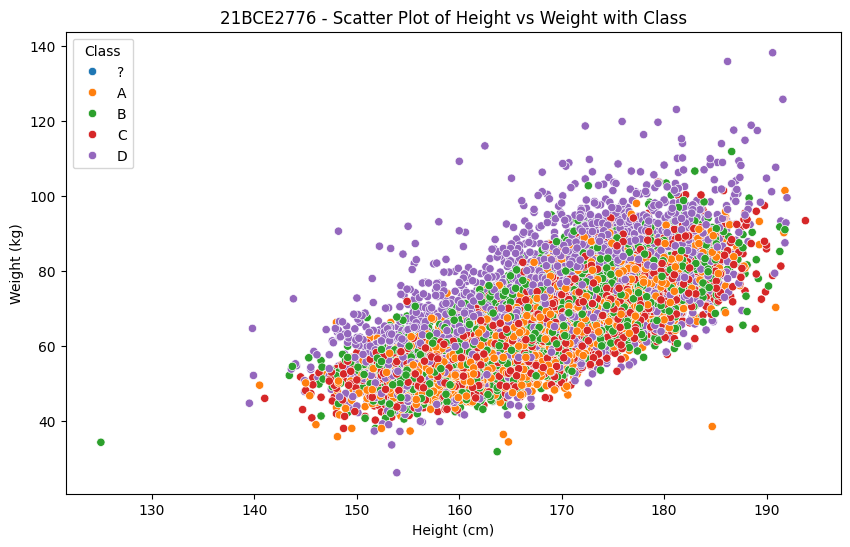

In [44]:
#MULTIVARIATE ANALYSIS # 1. Scatter Plot (ggplot equivalent using color as third variable)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='height_cm', y='weight_kg', hue='class', data=df)
plt.title('21BCE2776 - Scatter Plot of Height vs Weight with Class')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend(title='Class')
plt.show()

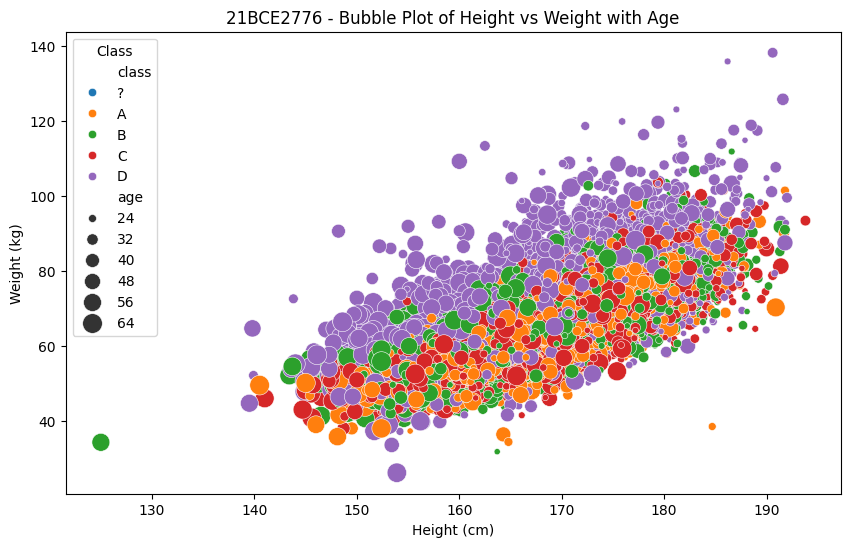

In [45]:
# 3. Bubble Plot (Using size for age and color for class)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='height_cm', y='weight_kg', hue='class', size='age', data=df, sizes=(20, 200))
plt.title('21BCE2776 - Bubble Plot of Height vs Weight with Age')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend(title='Class')
plt.show()

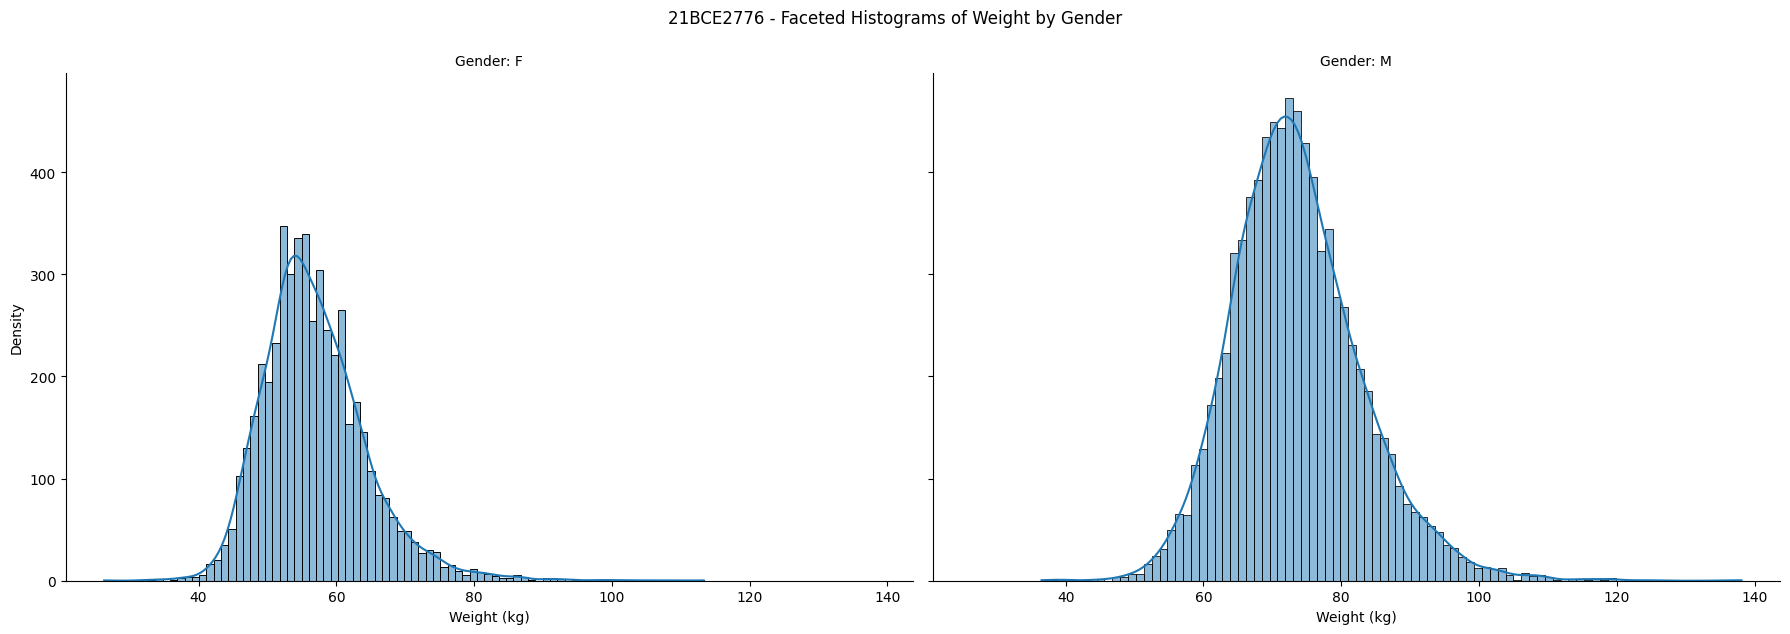

In [46]:
# 5. Faceted Plots (Subplots for Weight Distribution by Gender)
g = sns.FacetGrid(df, col='gender', height=6, aspect=1.5)
g.map(sns.histplot, 'weight_kg', kde=True)
g.set_axis_labels('Weight (kg)', 'Density')
g.set_titles('Gender: {col_name}')
g.fig.suptitle('21BCE2776 - Faceted Histograms of Weight by Gender', y=1.05)
plt.show()